## Notebook to assess potential machine learning applications to GTD 18 dataset

In [1]:
import pandas as pd
import numpy as np
from pandas_profiling import ProfileReport

#### Import local GTD data

In [2]:
gtd_path = 'GTD_13_18.csv'

gtd_df = pd.read_csv(gtd_path)

c:\users\richard.boulet\documents\python_all\python_projects\gtd\gtd_env\lib\site-packages\IPython\core\interactiveshell.py:3145: DtypeWarning: Columns (39,41,77,78) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
# check dataframe

# Dont limit dataframe size
pd.set_option("display.max_rows", 1_000)
pd.set_option("display.max_columns", 99)

gtd_df.columns

Index(['NAME', 'CONTINENT', 'eventid', 'iyear', 'imonth', 'iday', 'region_txt',
       'provstate', 'city', 'latitude', 'longitude', 'summary',
       'alternative_txt', 'multiple', 'success', 'suicide', 'attacktype1',
       'attacktype1_txt', 'attacktype2', 'attacktype2_txt', 'attacktype3',
       'attacktype3_txt', 'targtype1', 'targtype1_txt', 'targsubtype1',
       'targsubtype1_txt', 'corp1', 'target1', 'natlty1', 'natlty1_txt',
       'targtype2', 'targtype2_txt', 'targsubtype2', 'targsubtype2_txt',
       'corp2', 'target2', 'natlty2', 'natlty2_txt', 'gname', 'gsubname',
       'gname2', 'gsubname2', 'motive', 'guncertain1', 'guncertain2',
       'guncertain3', 'individual', 'nperps', 'nperpcap', 'claimed',
       'claimmode', 'claimmode_txt', 'compclaim', 'weaptype1', 'weaptype1_txt',
       'weapsubtype1', 'weapsubtype1_txt', 'weaptype2', 'weaptype2_txt',
       'weapsubtype2', 'weapsubtype2_txt', 'nkill', 'nkillus', 'nkillter',
       'nwound', 'nwoundus', 'nwoundte', 'prope

In [4]:
print(gtd_df.isna().sum())

NAME                       0
CONTINENT                  0
eventid                    0
iyear                      0
imonth                     0
iday                       0
region_txt                 0
provstate                  2
city                       0
latitude                   0
longitude                  0
summary                    0
alternative_txt        91757
multiple                   1
success                    0
suicide                    0
attacktype1                0
attacktype1_txt            0
attacktype2           107575
attacktype2_txt       107575
attacktype3           112431
attacktype3_txt       112431
targtype1                  0
targtype1_txt              0
targsubtype1            8022
targsubtype1_txt        8022
corp1                      0
target1                    0
natlty1                 1415
natlty1_txt             1415
targtype2             103071
targtype2_txt         103071
targsubtype2          103105
targsubtype2_txt      103105
corp2         

### Clean up data that have +100K nulls 

In [5]:
# loop and add columns that have more than 100K nulls, add to list, and will then drop 

columns_to_drop = []

for col in gtd_df.columns:
    
    if gtd_df[col].isna().sum() > 100_000:
        
        columns_to_drop.append(col)

        
columns_to_drop

['attacktype2',
 'attacktype2_txt',
 'attacktype3',
 'attacktype3_txt',
 'targtype2',
 'targtype2_txt',
 'targsubtype2',
 'targsubtype2_txt',
 'corp2',
 'target2',
 'natlty2',
 'natlty2_txt',
 'gsubname',
 'gname2',
 'gsubname2',
 'guncertain2',
 'guncertain3',
 'compclaim',
 'weaptype2',
 'weaptype2_txt',
 'weapsubtype2',
 'weapsubtype2_txt',
 'nhostkid',
 'nhostkidus',
 'nhours',
 'ndays',
 'divert',
 'kidhijcountry',
 'ransom',
 'hostkidoutcome',
 'hostkidoutcome_txt',
 'nreleased']

In [6]:
gtd_df.drop(columns_to_drop, 1, inplace = True)

In [7]:
gtd_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112822 entries, 0 to 112821
Data columns (total 59 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   NAME              112822 non-null  object 
 1   CONTINENT         112822 non-null  object 
 2   eventid           112822 non-null  int64  
 3   iyear             112822 non-null  int64  
 4   imonth            112822 non-null  int64  
 5   iday              112822 non-null  int64  
 6   region_txt        112822 non-null  object 
 7   provstate         112820 non-null  object 
 8   city              112822 non-null  object 
 9   latitude          112822 non-null  float64
 10  longitude         112822 non-null  float64
 11  summary           112822 non-null  object 
 12  alternative_txt   21065 non-null   object 
 13  multiple          112821 non-null  float64
 14  success           112822 non-null  int64  
 15  suicide           112822 non-null  int64  
 16  attacktype1       11

In [10]:
import folium
import config 

world_map = folium.Map(location=[44.66,10.66], 
                       zoom_start = 3, 
                       tiles = config.keys,
                       attr = 'Navigation'
                       )

# for label, lat, lng in zip(gtd_countries_transport['Name'], gtd_countries_transport['lat'], gtd_countries_transport['lon']):
#     folium.Marker(
#         [lat, lng],
#         radius=5,
#         color='red',
#         icon=folium.Icon(color='green'),
#         popup=label,
#         fill = True,
#         fill_color='red',
#         fill_opacity=0.6
#     ).add_to(world_map)


In [9]:
gtd_df.head(2)


NAME      CONTINENT       eventid  iyear  imonth  iday  \
0     Belize  North America  201301150025   2013       1    15   
1  Guatemala  North America  201301150024   2013       1    14   

                    region_txt provstate         city   latitude  longitude  \
0  Central America & Caribbean    Belize  Belize City  17.497717 -88.186833   
1  Central America & Caribbean   Jutiapa      Jutiapa  14.284180 -89.892811   

                                             summary alternative_txt  \
0  01/15/2013: Gunmen fired into the house of for...             NaN   
1  01/14/2013: Assailants opened fire on Carlos E...             NaN   

   multiple  success  suicide  attacktype1                 attacktype1_txt  \
0       0.0        1        0            7  Facility/Infrastructure Attack   
1       0.0        1        0            1                   Assassination   

   targtype1         targtype1_txt  targsubtype1  \
0          2  Government (General)          17.0   
1          2  Government (General)          15.0   

                                    targsubtype1_txt                  corp1  \
0                                      Head of State   Government of Belize   
1  Politician or Political Party Movement/Meeting...  Government of Jutiapa   

                                  target1  natlty1 natlty1_txt    gname  \
0        Former Prime Minister: Said Musa     22.0      Belize  Unknown   
1  Mayor: Carlos Enrique Castillo Medrano     83.0   Guatemala  Unknown   

  motive  guncertain1  individual  nperps  nperpcap  claimed  claimmode  \
0    NaN            0           0     -99         0        0        NaN   
1    NaN            0           0       2         0        0        NaN   

  claimmode_txt  weaptype1 weaptype1_txt  weapsubtype1  weapsubtype1_txt  \
0           NaN          5      Firearms           5.0  Unknown Gun Type   
1           NaN          5      Firearms           5.0  Unknown Gun Type   

   nkill  nkillus  nkillter  nwound  nwoundus  nwoundte  property  propextent  \
0    0.0      0.0       0.0     0.0       0.0       0.0         1         3.0   
1    1.0      0.0       0.0     0.0       0.0       0.0         0         NaN   

                propextent_txt  propvalue  \
0  Minor (likely < $1 million)      -99.0   
1                          NaN        NaN   

                                         propcomment  ishostkid addnotes  \
0  The front door of a civilian home and a vehicl...          0      NaN   
1                                                NaN          0      NaN   

                                              scite1  \
0  "BELIZE-POLITICS-Police protection for former ...   
1  "Guatemalan politician shot dead," BBC, Januar...   

                   dbsource  INT_LOG  INT_IDEO  INT_MISC  INT_ANY related  
0  START Primary Collection       -9        -9         0       -9     NaN  
1  START Primary Collection       -9        -9         0       -9     NaN

### Count of events by country for top 5 countries

In [33]:
country_counts = gtd_df.NAME.value_counts().head(50)

country_counts

Iraq                        25293
Afghanistan                 13506
Pakistan                    11408
India                        7186
Philippines                  5230
Somalia                      4679
Nigeria                      4582
Yemen                        4440
Libya                        3813
Ukraine                      3230
Egypt                        3190
Syria                        3109
Thailand                     2698
Turkey                       2310
Bangladesh                   1547
Colombia                     1173
Palestinian Territory        1125
Sudan                        1124
Congo DRC                     997
Israel                        919
United Kingdom                902
Mali                          748
Lebanon                       722
Kenya                         672
Nepal                         537
Saudi Arabia                  526
Cameroon                      495
Russian Federation            432
Burundi                       398
Central Africa

### Select certain countries to analyze 

In [42]:
countries = ['Iraq', 'Afghanistan', 'Pakistan', 'Philippines', 'Thailand']

gtd_countries = gtd_df[gtd_df['NAME'].isin(countries)]

In [43]:
gtd_countries.head(2)

NAME CONTINENT       eventid  iyear  imonth  iday  \
30126  Iraq      Asia  201301010002   2013       1     1   
30127  Iraq      Asia  201301010003   2013       1     1   

                       region_txt provstate          city   latitude  \
30126  Middle East & North Africa   Saladin  Tuz Khormato  34.886283   
30127  Middle East & North Africa   Saladin  Tuz Khormato  34.886283   

       longitude                                            summary  \
30126  44.629025  01/01/2013: An explosives-laden vehicle detona...   
30127  44.629025  01/01/2013: At least two explosives detonated ...   

      alternative_txt  multiple  success  suicide  attacktype1  \
30126             NaN       1.0        1        0            3   
30127             NaN       1.0        1        0            3   

         attacktype1_txt  attacktype2 attacktype2_txt  attacktype3  \
30126  Bombing/Explosion          NaN             NaN          NaN   
30127  Bombing/Explosion          NaN             NaN          NaN   

      attacktype3_txt  targtype1                targtype1_txt  targsubtype1  \
30126             NaN         14  Private Citizens & Property          75.0   
30127             NaN          3                       Police          25.0   

                      targsubtype1_txt                       corp1  \
30126         Village/City/Town/Suburb              Not Applicable   
30127  Police Security Forces/Officers  Iraqi Police Service (IPS)   

                       target1  natlty1 natlty1_txt  targtype2  \
30126                Civilians     95.0        Iraq        NaN   
30127  Police First Responders     95.0        Iraq       14.0   

                     targtype2_txt  targsubtype2      targsubtype2_txt  \
30126                          NaN           NaN                   NaN   
30127  Private Citizens & Property          14.0  Judge/Attorney/Court   

                corp2    target2  natlty2 natlty2_txt    gname gsubname  \
30126             NaN        NaN      NaN         NaN  Unknown      NaN   
30127  Not Applicable  Civilians     95.0        Iraq  Unknown      NaN   

      gname2 gsubname2 motive  guncertain1  guncertain2  guncertain3  \
30126    NaN       NaN    NaN            0          NaN          NaN   
30127    NaN       NaN    NaN            0          NaN          NaN   

       individual  nperps  nperpcap  claimed  claimmode claimmode_txt  \
30126           0     -99         0        0        NaN           NaN   
30127           0     -99         0        0        NaN           NaN   

       compclaim  weaptype1              weaptype1_txt  weapsubtype1  \
30126        NaN          6  Explosives/Bombs/Dynamite          15.0   
30127        NaN          6  Explosives/Bombs/Dynamite          16.0   

             weapsubtype1_txt  weaptype2 weaptype2_txt  weapsubtype2  \
30126                 Vehicle        NaN           NaN           NaN   
30127  Unknown Explosive Type        NaN           NaN           NaN   

      weapsubtype2_txt  nkill  nkillus  nkillter  nwound  nwoundus  nwoundte  \
30126              NaN    1.0      0.0       0.0     5.0       0.0       0.0   
30127              NaN    0.0      0.0       0.0     5.0       0.0       0.0   

       property  propextent               propextent_txt  propvalue  \
30126         1         3.0  Minor (likely < $1 million)      -99.0   
30127         1         3.0  Minor (likely < $1 million)      -99.0   

                                             propcomment  ishostkid  nhostkid  \
30126  Nearby homes and a fuel station were damaged i...          0       NaN   
30127  Nearby homes and a fuel station were damaged i...          0       NaN   

       nhostkidus  nhours  ndays divert kidhijcountry  ransom  hostkidoutcome  \
30126         NaN     NaN    NaN    NaN           NaN     NaN             NaN   
30127         NaN     NaN    NaN    NaN           NaN     NaN             NaN   

      hostkidoutcome_txt  nreleased  \
30126                NaN        NaN

### Now that the countries we are interseted in have been sliced out, we will dive deeper into individual rows of data and clean or remove rows as appropriate

In [44]:
# Profile the dataset

# profile = gtd_countries.profile_report(title='Pandas Profiling Report')
# profile.to_file(output_file="gtd_pandas_profiling.html")

In [45]:
gtd_countries.targtype1_txt.unique()

array(['Private Citizens & Property', 'Police', 'Government (General)',
       'Unknown', 'Terrorists/Non-State Militia', 'Military',
       'Religious Figures/Institutions', 'Business',
       'Educational Institution', 'Violent Political Party', 'Utilities',
       'Transportation', 'Other', 'Government (Diplomatic)',
       'Journalists & Media', 'Airports & Aircraft', 'Maritime',
       'Tourists', 'Food or Water Supply', 'Telecommunication', 'NGO'],
      dtype=object)

## Explore only rows that have transportation as an attack target

In [46]:
gtd_countries_transport = gtd_countries[gtd_countries.targtype1_txt == 'Transportation']

gtd_countries_transport.head(2)

NAME CONTINENT       eventid  iyear  imonth  iday  \
30258  Iraq      Asia  201302080013   2013       2     8   
30289  Iraq      Asia  201302170006   2013       2    17   

                       region_txt provstate     city   latitude  longitude  \
30258  Middle East & North Africa   Karbala  Karbala  32.614300   44.02483   
30289  Middle East & North Africa   Baghdad  Baghdad  33.374692   44.44754   

                                                 summary alternative_txt  \
30258  02/08/2013: An explosives-laden vehicle explod...             NaN   
30289  02/17/2013: A car bomb detonated at a bus stat...             NaN   

       multiple  success  suicide  attacktype1    attacktype1_txt  \
30258       0.0        1        0            3  Bombing/Explosion   
30289       1.0        1        0            3  Bombing/Explosion   

       attacktype2 attacktype2_txt  attacktype3 attacktype3_txt  targtype1  \
30258          NaN             NaN          NaN             NaN         19   
30289          NaN             NaN          NaN             NaN         19   

        targtype1_txt  targsubtype1  targsubtype1_txt    corp1      target1  \
30258  Transportation         105.0     Taxi/Rickshaw  Unknown   Taxi Stand   
30289  Transportation         101.0  Bus Station/Stop  Unknown  Bus Station   

       natlty1 natlty1_txt  targtype2 targtype2_txt  targsubtype2  \
30258     95.0        Iraq        NaN           NaN           NaN   
30289     95.0        Iraq        NaN           NaN           NaN   

      targsubtype2_txt corp2 target2  natlty2 natlty2_txt             gname  \
30258              NaN   NaN     NaN      NaN         NaN           Unknown   
30289              NaN   NaN     NaN      NaN         NaN  Al-Qaida in Iraq   

      gsubname gname2 gsubname2  \
30258      NaN    NaN       NaN   
30289      NaN    NaN       NaN   

                                                  motive  guncertain1  \
30258  The specific motive is unknown; however, sourc...            0   
30289  Al-Qa ida in Iraq stated that this string of a...            0   

       guncertain2  guncertain3  individual  nperps  nperpcap  claimed  \
30258          NaN          NaN           0     -99         0        0   
30289          NaN          NaN           0     -99         0        1   

       claimmode                  claimmode_txt  compclaim  weaptype1  \
30258        NaN                            NaN        NaN          6   
30289        7.0  Posted to website, blog, etc.        NaN          6   

                   weaptype1_txt  weapsubtype1 weapsubtype1_txt  weaptype2  \
30258  Explosives/Bombs/Dynamite          15.0          Vehicle        NaN   
30289  Explosives/Bombs/Dynamite          15.0          Vehicle        NaN   

      weaptype2_txt  weapsubtype2 weapsubtype2_txt  nkill  nkillus  nkillter  \
30258           NaN           NaN              NaN    5.0      0.0       0.0   
30289           NaN           NaN              NaN    4.0      0.0       0.0   

       nwound  nwoundus  nwoundte  property  propextent  \
30258    16.0       0.0       0.0        -9         NaN   
30289    10.0       0.0       0.0         1         3.0   

                    propextent_txt  propvalue  \
30258                          NaN        NaN   
30289  Minor (likely < $1 million)      -99.0   

                                             propcomment  ishostkid  nhostkid  \
30258  It is unknown if a taxi stand was damaged in t...          0       NaN   
30289           A bus station was damaged in this attack          0       NaN   

       nhostkidus  nhours  ndays divert kidhijcountry  ransom  hostkidoutcome  \
30258         NaN     NaN    NaN    NaN           NaN     NaN             NaN   
30289         NaN     NaN    NaN    NaN           NaN     NaN             NaN   

      hostkidoutcome_txt  nreleased  \
30258                NaN        NaN   
30289                NaN        NaN   

                                                addnotes  

## Map with certain country events shown

In [47]:
for attack, target, desc, lat, lng in zip(gtd_countries_transport['attacktype1_txt'], gtd_countries_transport['targsubtype1_txt'], gtd_countries_transport['summary'], gtd_countries_transport['latitude'], gtd_countries_transport['longitude']):
    folium.Marker(
        [lat, lng],
        radius=5,
        color='red',
        icon=folium.Icon(color='blue'),
        popup= (attack, target),
        fill = True,
        fill_color='red',
        fill_opacity=0.6
    ).add_to(world_map)
    
world_map

## Graphs to explore data

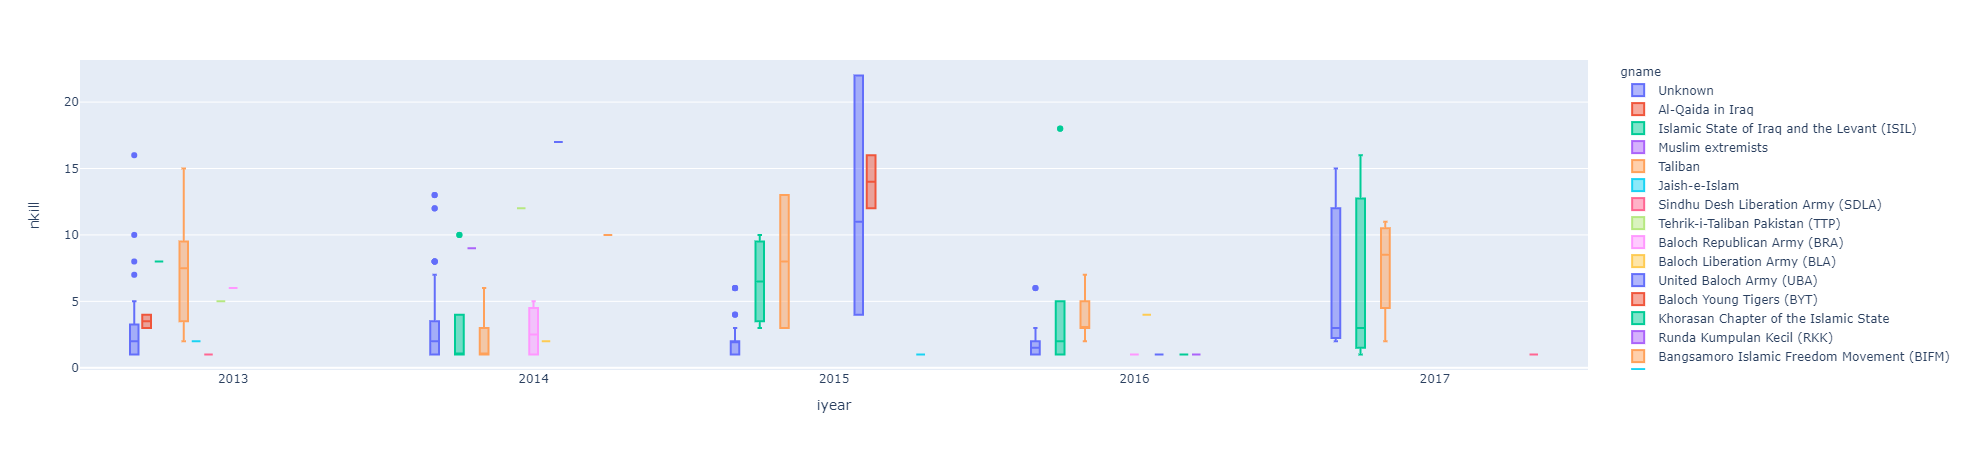

In [48]:
import plotly.express as px

gtd_countries_deaths = gtd_countries_transport[gtd_countries_transport.nkill > 0]

fig = px.box(gtd_countries_deaths, x = 'iyear', y = 'nkill', color = 'gname')
fig.show()

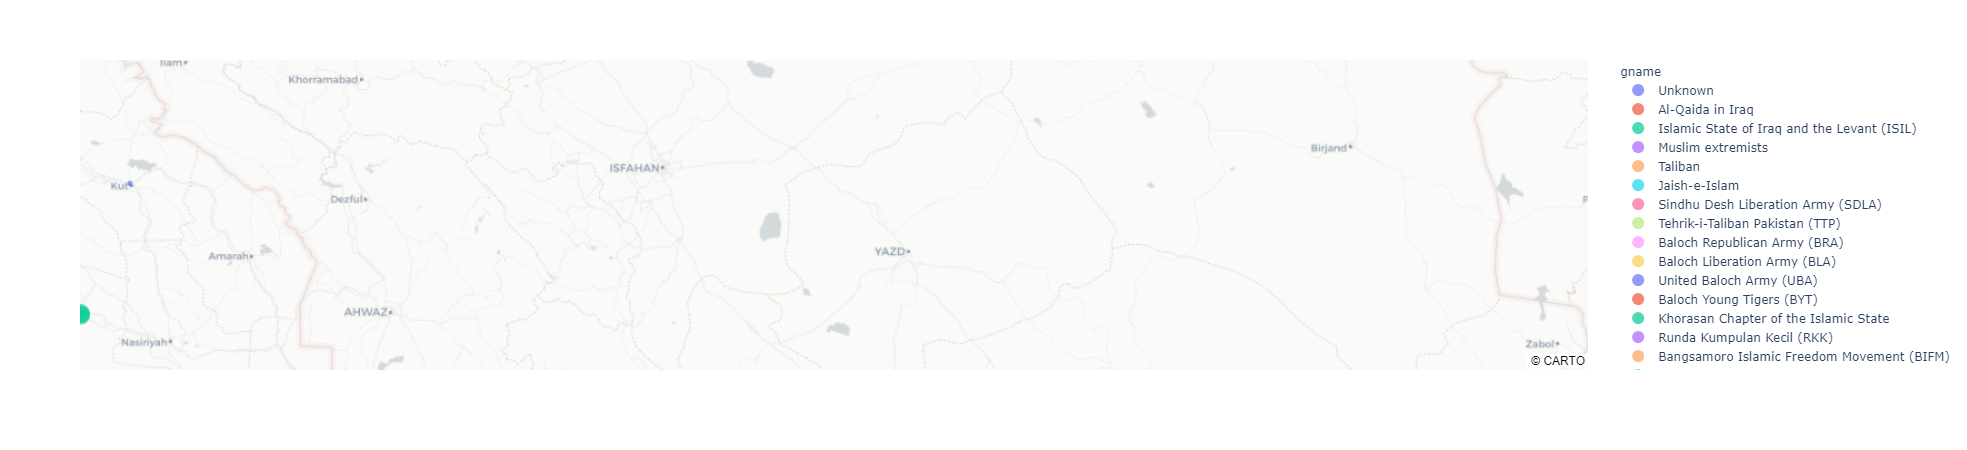

In [49]:
fig = px.scatter_mapbox(gtd_countries_deaths, lat="latitude", lon="longitude", color="gname", size="nkill",
                  color_continuous_scale=px.colors.cyclical.IceFire, size_max=15, zoom=6,
                  mapbox_style="carto-positron")
fig.show()

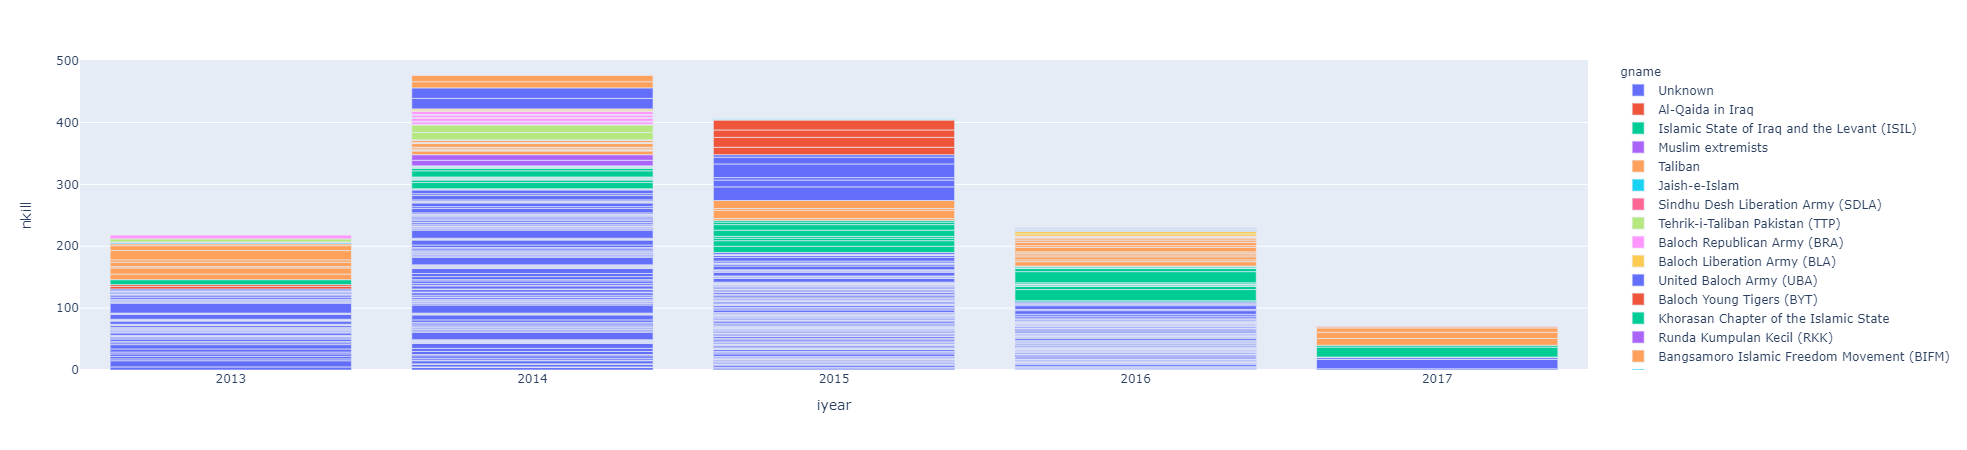

In [51]:
fig = px.bar(gtd_countries_deaths, x = 'iyear', y = 'nkill', color = 'gname')
fig.show()

## From the above two charts we can see that attacks against transportation in general that resulted in deaths seem to be centered in the Baghdad area over the years 2013 - 2018. Additionally, ISIL is the group (other than unidentified assailants) that has conducted the highest number of attacks against transportation that resulted in deaths, with their largest transportation attack resulting in 18 deaths. ISIL's most active year of attacks against transportation that resulted in deaths was roughly 55 persons in 2016. 

# Advanced Use Cases - Cleaning Data 

## The examples below show more advanced abilities of various packages to:

### - ID missing data points
### - Cleaning missing data
### - ID correlations between features in data

## These packages are intended to speed up and increase usability of data versus programming/ slicing/ manually cleaning data as I did above. THESE ARE BRUTE FORCE METHODS AND SHOULD BE USED SPARINGLY FOR FINAL FEATURE CREATION WHEN CLEANING DATA. 

## Identify Missing Values across a dataset

In [52]:
# Reload data from initial csv file again to show ease of cleaning with various package

gtd_path = 'GTD_13_18.csv'

gtd_df = pd.read_csv(gtd_path)

c:\users\richard.boulet\documents\python_all\python_projects\gtd\gtd_env\lib\site-packages\IPython\core\interactiveshell.py:3145: DtypeWarning:

Columns (39,41,77,78) have mixed types.Specify dtype option on import or set low_memory=False.



## The next step looks at brute force cleaning data. The following is done to the dataset to clean it:

### - Converts column names to underscores_lowercase_all
### - Drops empty or nearly (90%) empty columns of data
### - Removes single value columns
### - Drops duplicate rows
### - Optimizes datatypes (if it can be stored as integer versus a float it may attempt that, or if an int64 bit data type can be converted to a smaller int32 bit data type it will)

GridSpec(6, 6)

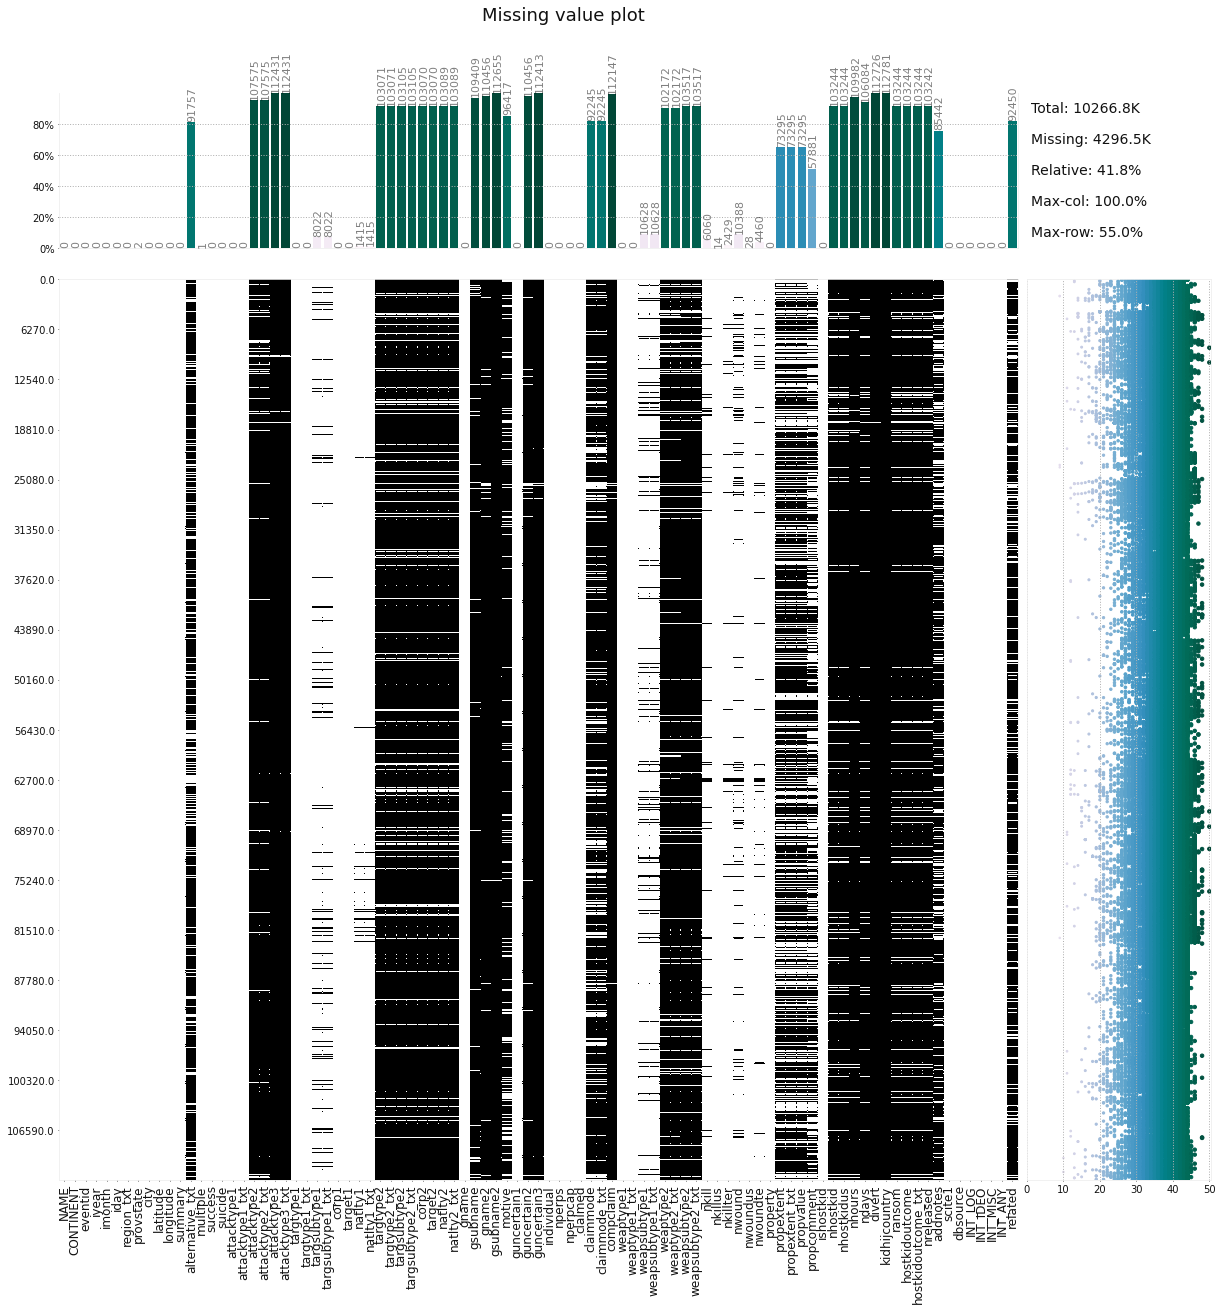

In [53]:
import klib


klib.missingval_plot(gtd_df) 

In [54]:
gtd_cleaned = klib.data_cleaning(gtd_df)

Shape of cleaned data: (103401, 58) - Remaining NAs: 812395

Changes:
Dropped rows: 9421
     of which 9421 duplicates. (Rows: [45, 47, 48, 49, 50, 51, 53, 54, 56, 66, 67, 68, 69, 70, 71, 232, 233, 238, 244, 245, 251, 253, 259, 262, 263, 264, 265, 266, 267, 269, 270, 271, 272, 273, 277, 278, 279, 283, 284, 285, 288, 289, 291, 296, 297, 298, 302, 304, 305, 307, 309, 310, 316, 317, 321, 324, 325, 328, 329, 330, 331, 332, 333, 340, 341, 346, 349, 350, 352, 355, 358, 361, 362, 439, 441, 442, 444, 445, 448, 464, 476, 514, 515, 528, 535, 536, 537, 538, 539, 540, 541, 542, 543, 545, 564, 608, 611, 612, 614, 615, 616, 617, 618, 620, 621, 622, 627, 690, 691, 692, 693, 694, 695, 696, 697, 698, 699, 700, 701, 702, 703, 705, 706, 708, 709, 710, 712, 714, 715, 716, 718, 719, 720, 721, 722, 723, 724, 725, 727, 728, 730, 731, 732, 733, 745, 758, 759, 760, 761, 764, 766, 774, 780, 781, 1359, 1360, 1362, 1367, 1368, 1370, 1372, 1376, 1379, 1380, 1381, 1385, 1393, 1399, 1400, 1401, 1402, 1403, 1406, 142

## Identify correlations between data points

<AxesSubplot:title={'center':'Feature-correlation (pearson)'}>

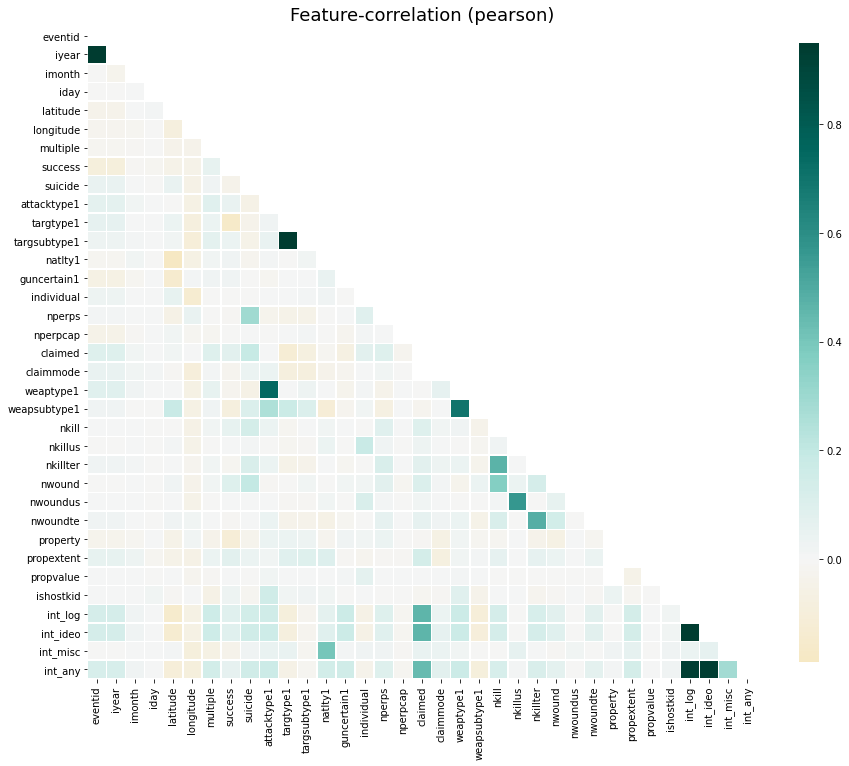

In [55]:
klib.corr_plot(gtd_cleaned, annot=False, figsize=(15,12))


Displaying positive correlations. Specify a positive "threshold" to further limit the results.


<AxesSubplot:title={'center':'Feature-correlation (pearson)'}>

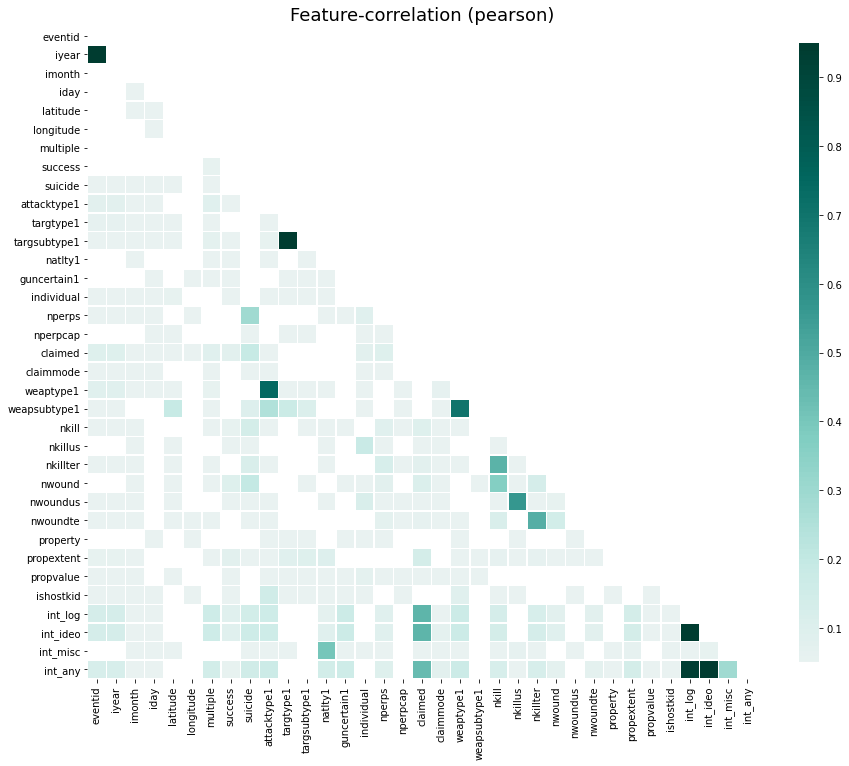

In [56]:
klib.corr_plot(gtd_cleaned, split='pos', annot=False, figsize=(15,12))


Displaying negative correlations. Specify a negative "threshold" to further limit the results.


<AxesSubplot:title={'center':'Feature-correlation (pearson)'}>

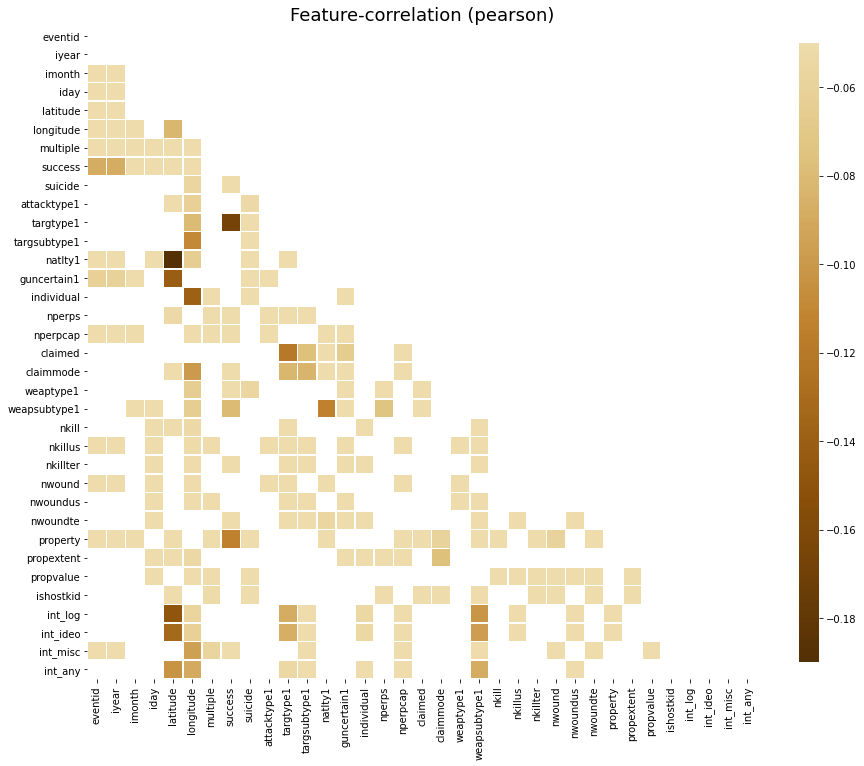

In [57]:
klib.corr_plot(gtd_cleaned, split='neg', annot=False, figsize=(15,12))

### Not surprisingly there are strong postiive correlations in events between deaths and injuries. It is hard to find any clear unknown correlations. In this case we could attempt to feed this data to somehting like a Random Forest model to try and derive meaning from things that we are unable to identify with simple correlations.

## Looking at target varible correlations within the data ( we will attempt to identify what correlations might exist related to attack methods)

<AxesSubplot:title={'center':'Feature-correlation (pearson)'}>

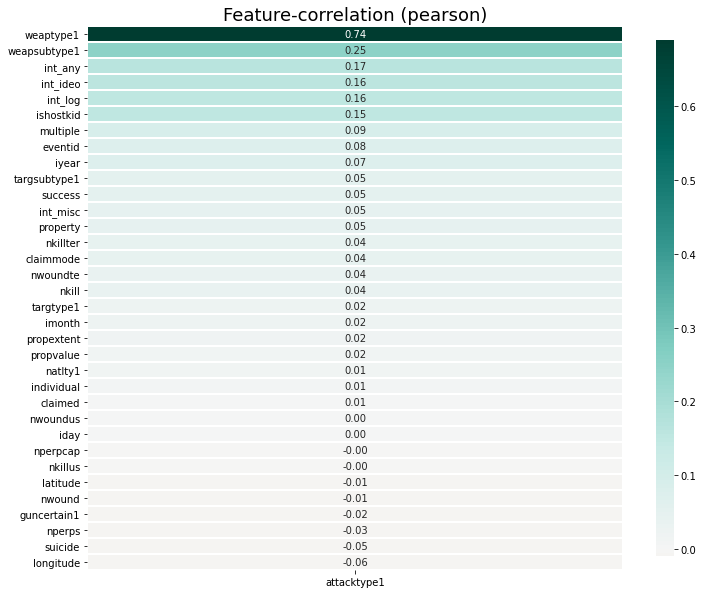

In [58]:
klib.corr_plot(gtd_cleaned, target = 'attacktype1')

<AxesSubplot:title={'center':'Feature-correlation (spearman)'}>

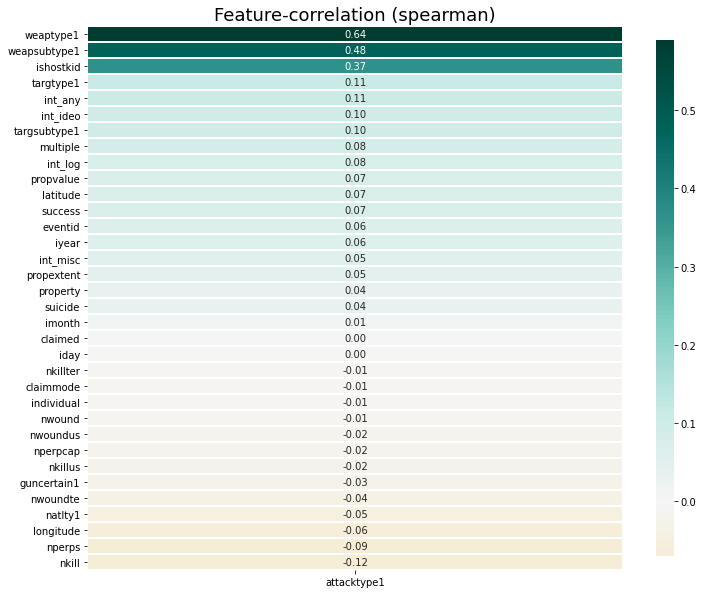

In [59]:
klib.corr_plot(gtd_cleaned, target = 'attacktype1', method = 'spearman')

<AxesSubplot:title={'center':'Feature-correlation (kendall)'}>

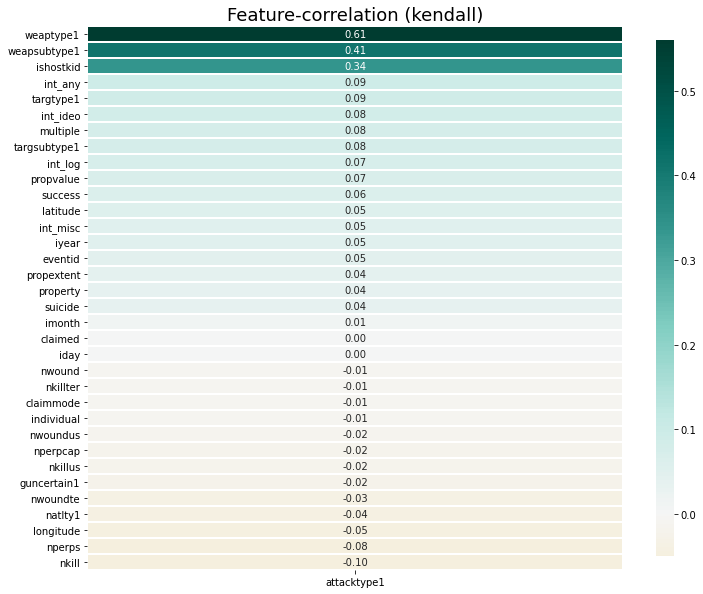

In [60]:
klib.corr_plot(gtd_cleaned, target = 'attacktype1', method = 'kendall')

## A really nice feature of klib package is categorical column vizualization, something that is obviously not the case when computing correlations. This helps identify how and to what extent to apply categorical encoding to categories when training models that require purely numeric inputs.

## Now that our data was cleaned (the rushed way) we can look at applying the data to various models. Throwing the kitchensink at the data is the wrong approach, but we will demonstrate the capabilities of easily fitting numerous types of models to the data using Pycaret.

GridSpec(6, 6)

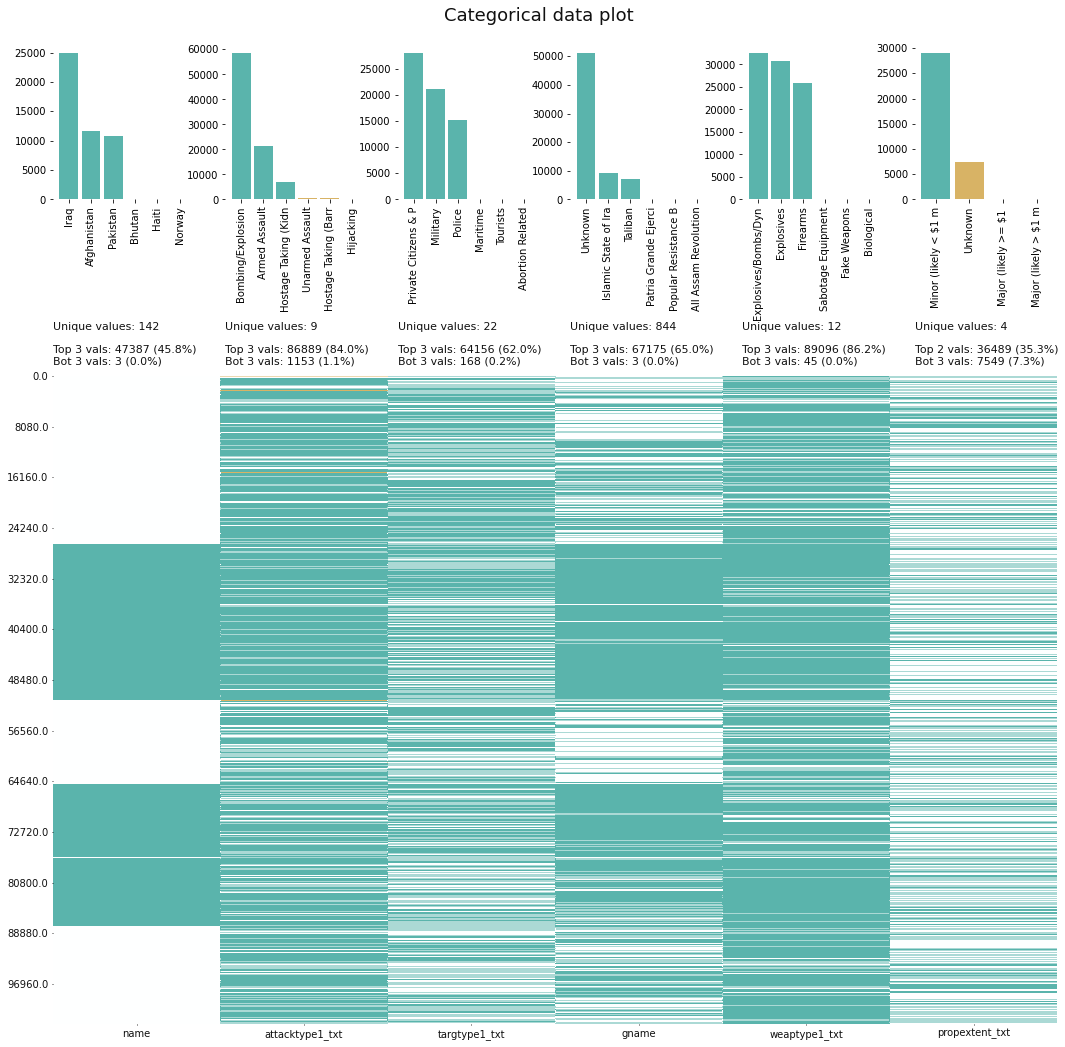

In [61]:
gtd_clean_text = gtd_cleaned[['name', 'attacktype1_txt', 'targtype1_txt', 'gname', 'weaptype1_txt', 'propextent_txt']]

klib.cat_plot(gtd_clean_text)

## From the methods above, in a real world situation of modeling, domain expertise would be critical to identify the causalities, and if they are being accounted for appropriately, with the correlations we found, and did not find, above. 

# Modeling

### Now that our data was cleaned (the rushed way) we can look at applying the data to various models. We will also look at "throwing the kitchensink" at the data (using a package called pycaret) which is the wrong approach, but we will demonstrate the capabilities of easily fitting numerous types of models to the data.

## Model 1. Exploring Unsupervised Clustering with K-Means

### A simple and easy way to tell if underlying patterns and clusters exist in the data is to do an unsupervised  clustering to see if the model can differentiate between data points on it's own, without providing labeled data points to make assumptions on, which we will do later on. 

In [62]:
# package imports for k-means

import matplotlib.pyplot as plt
from kneed import KneeLocator
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

In [63]:
link = 'https://realpython.com/k-means-clustering-python/'
    
    